<h1 style="text-align:center; font-size:24">
BIOCB 4381/6381 Assignment 2<br>
</h1>

<div style="background-color: #e6e6e6; border-color: #999999; border-left: 5px solid #999999; padding: 1.5em; color: #666666">
    
**INSTRUCTIONS:** Please answer problems in this notebook in the corresponding sections. You are free to add new cells based on your need.

**MODULE IMPORT:** In the first trunk below, I wrote import statements for all packages you may need to use in this assignment. If there's any package not installed in your environment, please first check and install them. You are NOT allowed to rely on any other packages/modules that are not included here.

**NOTE:** 
* PLOTS: please label the figures your generated properly (axis labels, title, etc.)
* After you have completed your assignment, please test it by clicking **KERNEL** and selecting **RESTART & RUN ALL** from the drop-down menu to make sure it can run smoothly from the beginning to the end. I will only modify the file paths to my own on when grading
<div/>

This is a Markdown cell. Please double-click to edit this cell. When you finish, use `shift+enter` (Windows) or `shift+return` (Mac) key

**Please acknowledge your collaborator(s) in here:**



In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean  # python built-in module (no need to install)
from Bio import SeqIO, pairwise2
from Bio.Align import substitution_matrices


<h3 style="background-color: #daebff; border-color: #bad5f6; border-left: 5px solid #bad5f6; padding: 1.5em; color: #6f89a9">
Problem 1 BLAST Command-Line Tool
</h3>

#### (b) run BLAST (Please show your code below) and show your result file below: (Please load the file to show result below)

```bash
cd HW2
makeblastdb -in Ref_seqs.fasta -dbtype nucl -out MyNucleotideDB
blastn -query Sanger_seq.fasta -db MyNucleotideDB -outfmt 6 -out blast_sanger_to_ref.txt
```

In [232]:
# Load results
q1=pd.read_csv("blast_sanger_to_ref.txt",sep="\t")
q1

,seq1,LOC_OS01G56930.1,97.538,528,13,0,9,536,153,680,0.0,904


<h3 style="background-color: #daebff; border-color: #bad5f6; border-left: 5px solid #bad5f6; padding: 1.5em; color: #6f89a9">
Problem 2 Human-Mouse Protein Homologs
</h3>

#### (a) Please parse blast_mouse2human.txt to a `pandas.DataFrame` named as `blast_df`

In [233]:
blast_df=pd.read_csv("blastn_mouse2human.txt",sep="\t",header=None,names=["qseqid","sseqid","pident","length","mismatch","gapopen","qstart","qend","sstart","send","evalue","bitscore"])
blast_df.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,Q9CQW9,Q01628,70.312,128,38,0,1,128,1,128,1.630000e-64,192.0
1,Q9CQW9,Q01629,66.165,133,43,2,1,133,1,131,9.930000e-61,182.0
2,Q9CQW9,C9JQL5,70.370,108,32,0,1,108,1,108,3.410000e-54,166.0
3,Q9CQW9,P13164,75.000,96,24,0,24,119,3,98,1.160000e-49,154.0
4,Q9CQW9,A6NNB3,48.052,77,25,2,32,108,26,87,2.170000e-21,82.8


#### (b) Box-plot showing E-value distribution for each query sequence 

please display the figure you generated

<AxesSubplot:title={'center':'evalue'}, xlabel='qseqid', ylabel='E-value'>

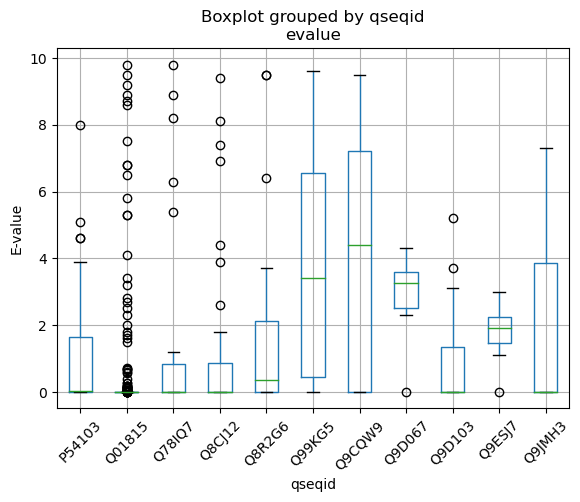

In [234]:
# len(blast_df)
# blast_df["qseqid"].unique()


plot1=blast_df[["qseqid","evalue"]].boxplot(column='evalue',by='qseqid',rot=45)
plot1.set_ylabel("E-value")
plot1

#### (c) Top-hits

In [235]:
qseqid_item=list(blast_df["qseqid"].unique())

In [236]:
top_hit = blast_df.loc[blast_df.groupby('qseqid')['evalue'].idxmin()]
top_hit

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
65,P54103,Q99543,94.203,621,36,0,1,621,1,621,0.000000e+00,1129.0
195,Q01815,Q13936,91.408,2223,105,6,1,2139,1,2221,0.000000e+00,4163.0
531,Q78IQ7,Q6P5W5,71.184,642,161,5,24,660,25,647,0.000000e+00,791.0
123,Q8CJ12,Q8IZP9,80.686,1020,183,6,1,1009,1,1017,0.000000e+00,1602.0
17,Q8R2G6,Q76M96,83.455,955,147,3,1,949,1,950,0.000000e+00,1502.0
37,Q99KG5,Q86X29,79.966,594,102,7,13,594,61,649,0.000000e+00,822.0
0,Q9CQW9,Q01628,70.312,128,38,0,1,128,1,128,1.630000e-64,192.0
554,Q9D067,Q8TC05,69.444,720,200,13,1,707,1,713,0.000000e+00,936.0
504,Q9D103,Q01628,67.961,103,32,1,1,102,22,124,4.210000e-46,144.0
516,Q9ESJ7,Q5VVH5,82.308,260,45,1,1,259,1,260,8.310000e-158,438.0


In [237]:
qualified_top_hit=top_hit[top_hit["length"]<=200]
qualified_top_hit=qualified_top_hit.reset_index(drop=True)
qualified_top_hit

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,Q9CQW9,Q01628,70.312,128,38,0,1,128,1,128,1.630000e-64,192.0
1,Q9D103,Q01628,67.961,103,32,1,1,102,22,124,4.210000e-46,144.0


#### (d) Load UniProt_Partial_MM.fasta and UniProt_HS.fasta with `SeqIO` module

In [238]:
import os
dict_query=SeqIO.to_dict(SeqIO.parse(os.path.join("data","UniProt_Partial_MM.fasta"),"fasta"))
dict_target=SeqIO.to_dict(SeqIO.parse(os.path.join("data","UniProt_HS.fasta"),"fasta"))
# dict1.keys()

In [239]:
from Bio.Align import substitution_matrices
# substitution_matrices.load()

#### (e) Pairwise alignment with `pairwise2`

In [240]:
matrix = substitution_matrices.load("BLOSUM62")
# pairwise2.align.localds(dict_target["Q01628"].seq, dict_query["Q9D103"].seq,match_dict=matrix, open=-20, extend=-10)

In [241]:
for i in range(len(qualified_top_hit)):
        align_l=pairwise2.align.localds(dict_target[qualified_top_hit["sseqid"][i]].seq, dict_query[qualified_top_hit["qseqid"][i]].seq, match_dict=matrix, open=-20, extend=-10)
        print(pairwise2.format_alignment(*align_l[0]))

1 MNHTVQTFFSPVNSGQPPNYEMLKEEHEVAVLGAPHNPAPPTSTVIHIRSETSVPDHVVWSLFNTLFMNPCCLGFIAFAYSVKSRDRKMVGDVTGAQAYASTAKCLNIWALILGILMTILLIVIPVLI
  ||||.|.|......|||||||..|||.|||..||||..|....|||....|.|||||||||||||||||.|||||||.||||||||||||||||||||||||||||||..|.|.|||....||....|
1 MNHTSQAFITAASGGQPPNYERIKEEYEVAEMGAPHGSASVRTTVINMPREVSVPDHVVWSLFNTLFMNFCCLGFIAYAYSVKSRDRKMVGDVTGAQAYASTAKCLNISTLVLSILMVVITIVSVIII
  Score=473

22 MLKEEHEVAVLGAPHNPAPPTSTVIHIRSETSVPDHVVWSLFNTLFMNPCCLGFIAFAYSVKSRDRKMVGDVTGAQAYASTAKCLNIWALILGILMTILLIVI
   |.||..||.|||.||.....|.|.|.. .|.|.|||||||||||||||.|||||.|.||||||||||||||.|||||.|||||||||..|...||..|..||.
 1 MPKEQQEVVVLGSPHISTSATATTINM-PEISTPDHVVWSLFNTLFMNFCCLGFVAYAYSVKSRDRKMVGDTTGAQAFASTAKCLNISSLFFTILTAIVVIVV
  Score=343



<h3 style="background-color: #daebff; border-color: #bad5f6; border-left: 5px solid #bad5f6; padding: 1.5em; color: #6f89a9">
Problem 3 Next-Generation Sequencing Data Analysis
</h3>

#### (a) Load FASTQ file (sample.fastq) and create dictionaries

In [252]:
# record_dict = SeqIO.to_dict(SeqIO.parse(os.path.join("data","sample.fastq"), "fastq"))
with open(os.path.join("data","sample.fastq"), "r") as f:
    lines = f.readlines()
lines[:10]

['@HWI-ST397:389:C42DEACXX:8:1101:1161:8228\n',
 'GAGGTNNNNNNNNNNNNNNNNNNNNNNNNAAAGNATGATCAGGGAGTGGAACCTTAGCTCGAGCCCGCAGATGACCTGGATGGAGGCACGGAGGAGCAGGG\n',
 '+\n',
 '<<<?@########################-0<=#0<=?????????=???????????@@??===<<<<<<====<=<<<==<=<<<<<::6:95<<8<<6\n',
 '@HWI-ST397:389:C42DEACXX:8:1101:19784:8212\n',
 'AAAGGAGAAAAGAAATTGCCCAGAAGGCAGCAGAGGAAAATGAGAGATACCGGAAGGAGATGGAACAGATT\n',
 '+\n',
 'CCCFFFFFHHHHHJJJJIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIHHHHHFFFFFEEE\n',
 '@HWI-ST397:389:C42DEACXX:8:1101:13264:8455\n',
 'GTGGGAGACCTGAAGCTGGTCATCAATGAACCCAGCCGTCTGCCTCTGTTTGATGCCATTCGGCCGCTGATCCCACTGAAGCACCAGGTGGAATATGATCA\n']

In [257]:
#  'GAGGTNNNNNNNNNNNNNNNNNNNNNNNNAAAGNATGATCAGGGAGTGGAACCTTAGCTCGAGCCCGCAGATGACCTGGATGGAGGCACGGAGGAGCAGGG\n'[:-2]

'GAGGTNNNNNNNNNNNNNNNNNNNNNNNNAAAGNATGATCAGGGAGTGGAACCTTAGCTCGAGCCCGCAGATGACCTGGATGGAGGCACGGAGGAGCAGG'

In [260]:
# record_dict = SeqIO.to_dict(SeqIO.parse(os.path.join("data","sample.fastq"), "fastq"))
# record_dict
label2seq={}
label2qual={}

for i in range(0, len(lines), 4):
    # remove newline character; only extract the identifier; remove "@"
    seq_label = lines[i].strip().split(" ")[0][1:]
    seq_str=lines[i+1].strip()
    seq_qual = lines[i+3].strip()
    label2seq[seq_label] = seq_str
    label2qual[seq_label] =seq_qual

label2seq

{'HWI-ST397:389:C42DEACXX:8:1101:1161:8228': 'GAGGTNNNNNNNNNNNNNNNNNNNNNNNNAAAGNATGATCAGGGAGTGGAACCTTAGCTCGAGCCCGCAGATGACCTGGATGGAGGCACGGAGGAGCAGGG',
 'HWI-ST397:389:C42DEACXX:8:1101:19784:8212': 'AAAGGAGAAAAGAAATTGCCCAGAAGGCAGCAGAGGAAAATGAGAGATACCGGAAGGAGATGGAACAGATT',
 'HWI-ST397:389:C42DEACXX:8:1101:13264:8455': 'GTGGGAGACCTGAAGCTGGTCATCAATGAACCCAGCCGTCTGCCTCTGTTTGATGCCATTCGGCCGCTGATCCCACTGAAGCACCAGGTGGAATATGATCA',
 'HWI-ST397:389:C42DEACXX:8:1101:19899:12747': 'CCAGAGCAGATCATGGGGAAGGATGTCCGGCTCCTACGCATCAAGAAGGAGGGATCCTTAGACCTGGCCCT',
 'HWI-ST397:389:C42DEACXX:8:1101:19165:15788': 'GGGAAGGATGTCCGGCTCCTACGCATCAAGAAGGAGGGATCCTTAGACCTGGCCCTGGAAGGCGGTGTGGACTCCCCCATTGGGAAGGTGGTTGTTTCTGC',
 'HWI-ST397:389:C42DEACXX:8:1101:15398:23113': 'ACGAGATCATGGCAATCAACGGCAAGATTGTGACAGACTACACCCTGGCTGAGGCTGACGCTGCCCTGCAGAAGGCCTGGAATCAGGGCGGGGACTGGATC',
 'HWI-ST397:389:C42DEACXX:8:1101:18936:24726': 'CGGTGTGGACTCCCCAATTGGGAAGGTGGTTGTTTCTGCTGTGTATGAGCGGGGAGCTGCTGAGCGGCATGGTGGCATTGTGAAAGGGGACGAGATCATGA',


#### (b) GC content per sequence

*Please follow the following steps and display the histogram you generated.*

* First, let's take a step back and try to define a function `gc_content()` that takes a single sequence string
* Next, we can loop through all the sequence string we have, and apply the `gc_content()` function to each of them. You may want to append your results to a list
* Finally, we can generate a histogram with `matplotlib` package. 

In [265]:
def gc_content(str):
    return (str.count("G")+str.count("C"))/(str.count("A")+str.count("T")+str.count("G")+str.count("C"))

In [299]:
gc_result=[]
for i in label2seq:
    gc_result.append(gc_content(label2seq[i])) 

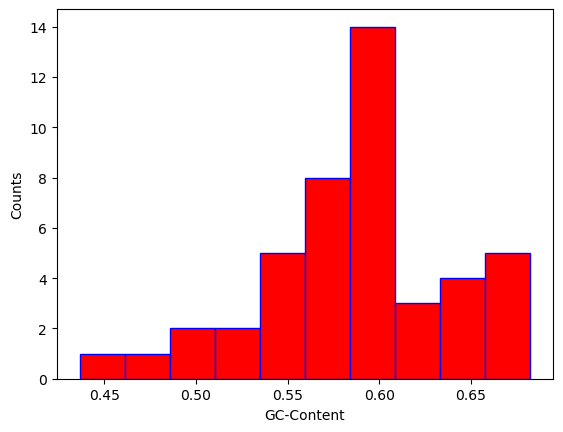

In [327]:
gc_result_df=pd.DataFrame(gc_result,columns=["GC Content"])
plt.hist(gc_result_df,color="r",ec="blue")
plt.xlabel("GC-Content")
plt.ylabel("Counts")
plt.show()
# plot=gc_result_df.hist()
# for it in plot[0]:
#     it.set_ylabel("Counts")
# plot    

#### (c) Per-sequence average quality

*Please follow the following steps and display the density plot you generated.*

* Similar to part (b), let's first define a function `parse_quality_string()` that converts a single quality string to a list of quality scores
* Then, we can loop through all the quality strings, apply the `parse_quality_string()` function to each of them, and compute the average score of each string (you can do this with `mean` from the built-in `statistics` module). Similarly, you can use a list to store your results.
* Finally, we can generate a density plot with `seaborn.kdeplot()`. 

In [312]:
def parse_quality_string(string, base=33):
    qualities = []
    for char in string:
        qualities.append(ord(char)-base)
    return qualities

In [320]:
# parse_quality_string(label2qual["HWI-ST397:389:C42DEACXX:8:1101:1161:8228"])
all_scores=[]
for i in label2qual:
    all_scores.append(sum(parse_quality_string(label2qual[i]))/len(label2qual[i]))
all_scores

[21.04950495049505,
 39.61971830985915,
 37.86138613861386,
 39.08450704225352,
 37.53465346534654,
 37.48514851485149,
 36.92079207920792,
 38.15841584158416,
 37.13861386138614,
 37.98019801980198,
 37.76237623762376,
 36.772277227722775,
 38.46534653465346,
 37.148514851485146,
 37.68316831683168,
 37.08910891089109,
 35.227722772277225,
 38.84158415841584,
 38.92063492063492,
 37.663366336633665,
 37.613861386138616,
 35.94117647058823,
 36.89108910891089,
 37.51485148514851,
 30.22772277227723,
 37.04950495049505,
 37.663366336633665,
 38.26732673267327,
 38.18811881188119,
 37.95049504950495,
 37.46534653465346,
 36.772277227722775,
 38.82051282051282,
 38.93069306930693,
 36.470588235294116,
 36.26732673267327,
 35.94059405940594,
 37.78217821782178,
 37.24752475247525,
 38.04950495049505,
 37.99009900990099,
 38.17821782178218,
 37.722772277227726,
 37.524752475247524,
 37.742574257425744]

<AxesSubplot:ylabel='Density'>

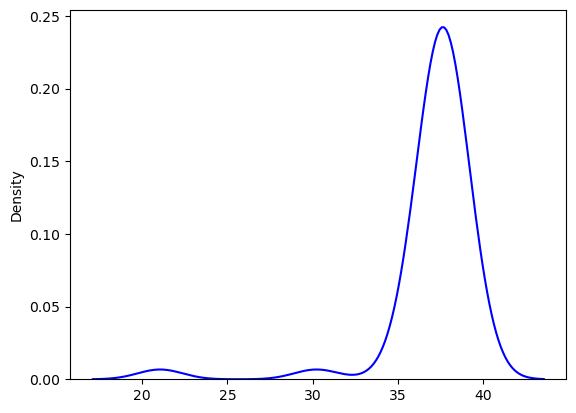

In [328]:
import seaborn
seaborn.kdeplot(all_scores,color="blue")

<h3 style="background-color: #daebff; border-color: #bad5f6; border-left: 5px solid #bad5f6; padding: 1.5em; color: #6f89a9">
Problem 4 FastQC Analysis 
</h3>

```bash
cd /home/lz568/HW2
ln -s /home/DATA/HW2/DNA_Seq.fastq DNA_Seq.fastq
ls
fastqc DNA_Seq.fastq
```

### What are the total reads, sequence length and GC content percentage?

| | |
|-----|------|
|Total read | 45018569|
|Sequence length | 150|
|GC content percentage | 53

### Describe the following plots in a few sentences:
* Per base sequence quality
    - Most position in reads are in the orange and red region of the quality score. Position 100-124 have worst quality, which takes up about 1/3 of the entire read. For the green region, there is a flat lines indicating the relatively good quality. Whereas in the red and orange region, the lines undulates with a valley at the red region. There is also a gradual decrease in quality scores at the end. 

* Per base sequence content
    - The %T(red),%C(blue), and %A(green) lines undulates but overall have a downward trend, where A reads has the most percentage, T reads has the second most, and C reads has the lowest. However, %G(grey) lines continue to go up and ends up at about 85%
    
* Per sequence GC content
    - The theoretical curve suggest a normal-like distrution with the mean of 46%. Whereas the actual GC count per read curve has normal-like distribution with an almost identical mean but less standard deviation comparing to the theoretical one.

### By checking the results, do you find any issue? What might cause such issue? Is there any solution to fix such issue instead of resequencing the sample?

There is a continuous rise in % of adapter content in the Adapter Content graph for position after 30. Also, we can find a overrepresented sequence of "GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG" in Overrepresented sequences chart. Besides There is also a sudden rise (a peak) on the Per seq uence qualityscores plot. I did some research on the Internet, this might indicate problems or issues with the sequencing run caused by reason including poor base-calling, adapter contamination, or localized issues during sequencing, such as signal decay or problems with fluorophores or chemistry in Illumina sequencing. 

Solutions might be using tools like Cutadapt to do adapter trimming, or using Trimmomatic to do quality trimming to remove bad bases, if exist.